# Analyzing Customer Purchase Behavior Using Transaction Data

----

#Retail Data Mining Project - Checkpoint 1


## Project Checkpoint 1 - Retail Data Mining
## Author: [Oluwafunmilayo Ifekoya's]
## Course: [Data Analysis]
## Description: Dataset Selection, Comparison, and EDA

----

## Major: Data Science

## Project Theme

This project analyzes customer purchase behavior in online retail data.
The goals are to discover:
- Product associations
- Customer segments
- Temporal sales patterns

The project applies both course techniques and advanced data mining methods.


## A. Candidate Datasets

### Dataset 1: Online Retail (UCI)
- Source: UCI Machine Learning Repository
- Course Topics: Frequent itemsets, clustering
- Beyond Course: Sequential pattern mining
- Size: ~500,000 transactions
- Data Types: InvoiceNo, ProductID, Quantity, Price, Date
- Target: None (unsupervised)
- License: Public research use

### Dataset 2: Instacart Market Basket
- Source: Kaggle
- Course Topics: Association rules
- Beyond Course: Recommendation systems
- Size: ~3 million orders
- Data Types: Orders, Products, Reorders
- Target: Reorder probability
- License: Research/educational

### Dataset 3: Amazon Reviews
- Source: SNAP/Amazon
- Course Topics: Text mining
- Beyond Course: Topic modeling, BERT
- Size: Millions of reviews
- Data Types: Review text, Rating, UserID
- Target: Rating
- License: Research use

In [ ]:
# ================================
# 1. Import Libraries
# ================================


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Settings
pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (8, 5)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# ================================
# 2. Load Dataset
# ================================


# Online Retail Dataset (UCI)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"


df = pd.read_excel(url)


print("Dataset Shape:", df.shape)
df.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Dataset Shape: (541909, 8)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
df.to_csv("retail_subset.csv", index=False)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
df = pd.read_csv("retail_subset.csv")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# Explanation

## Dataset Loading

The Online Retail dataset was loaded from the UCI Machine Learning Repository.
Due to the large size of the original dataset (over 500,000 transactions),
a subset of the data was used for exploratory analysis and model prototyping.

Limiting the number of rows improves computational efficiency while preserving
the underlying structure and purchasing patterns of the data. In fact, this approach
is common in early stage data analysis and enables rapid iteration without
sacrificing analytical validity. However, the subset maintains representative purchasing behavior while improving computational feasibility during exploratory analysis



In [ ]:
# ================================
# 3. Basic Data Information
# ================================


print("\nData Info:")
df.info()


print("\nMissing Values:")
print(df.isnull().sum())


print("\nDuplicate Rows:", df.duplicated().sum())

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

Missing Values:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


Duplicate Rows: 5268


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# EXPLANATION

##Data Inspection

The df.info() method reveals the dataset's structure, including column names, non-null counts, and data types. This provides a quick overview of the data's composition and helps identify potential type mismatches that may require conversion.Whereas, the missing values analysis shows the count of null entries per column. Understanding the pattern and extent of missing data is essential for deciding appropriate imputation strategies or column removals before modeling.

The duplicate rows check quantifies exact record repetitions within the dataset. Hence, identifying and removing duplicates ensures that subsequent analyses are not biased by overrepresented transactions, leading to more accurate and reliable insights.

In [ ]:
# ================================
# 4. Data Cleaning
# ================================


# Remove missing CustomerID
df = df.dropna(subset=["CustomerID"])


# Remove negative or zero quantities and prices
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]


# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


# Create TotalPrice column
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]


print("After Cleaning Shape:", df.shape)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

After Cleaning Shape: (397884, 9)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# EXPLANATION

## Data Cleaning and Preprocessing

Real world retail data often contains missing values, returns, and erroneous entries.
However, to ensure meaningful analysis, several cleaning steps were performed:

- Transactions with missing CustomerID values were removed, as customer level analysis
  is not possible without reliable identifiers.
- Records with non positive quantities or unit prices were filtered out to eliminate
  returns and data entry errors.
- The Invoice-Date column was converted to a datetime format to enable temporal analysis.
- A new TotalPrice feature was created to represent the monetary value of each transaction.

These preprocessing steps improve data quality and ensure that downstream analyses
reflect genuine customer purchasing behavior.

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

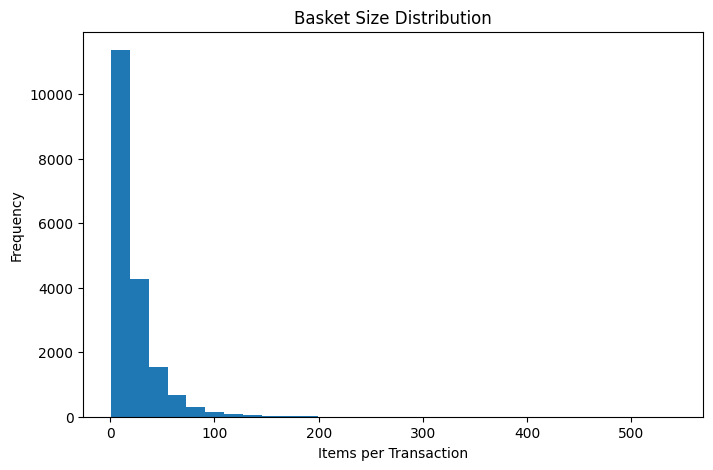

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# ================================
# 5. Exploratory Data Analysis (EDA)
# ================================


# 5.1 Basket Size Distribution
basket_sizes = df.groupby("InvoiceNo")["StockCode"].count()


plt.hist(basket_sizes, bins=30)
plt.title("Basket Size Distribution")
plt.xlabel("Items per Transaction")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

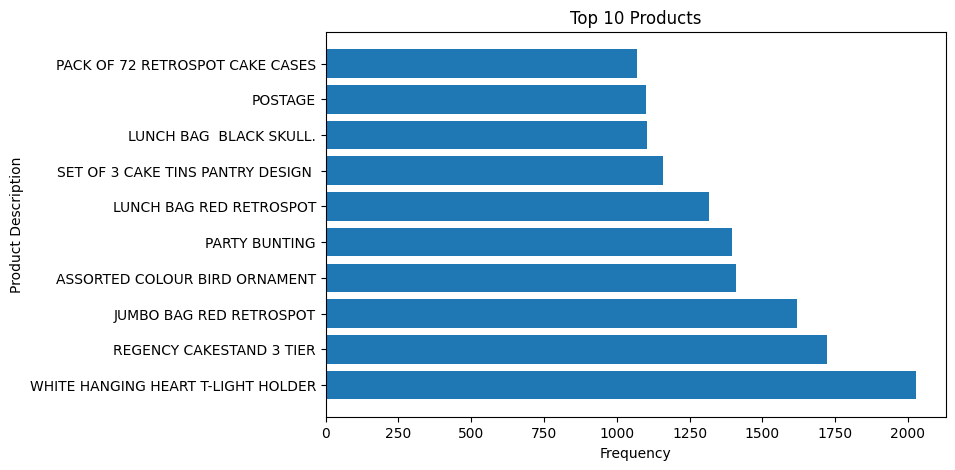

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
top_products = df["Description"].value_counts().head(10)


plt.barh(top_products.index, top_products.values)
plt.title("Top 10 Products")
plt.xlabel("Frequency")
plt.ylabel("Product Description")
plt.show()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

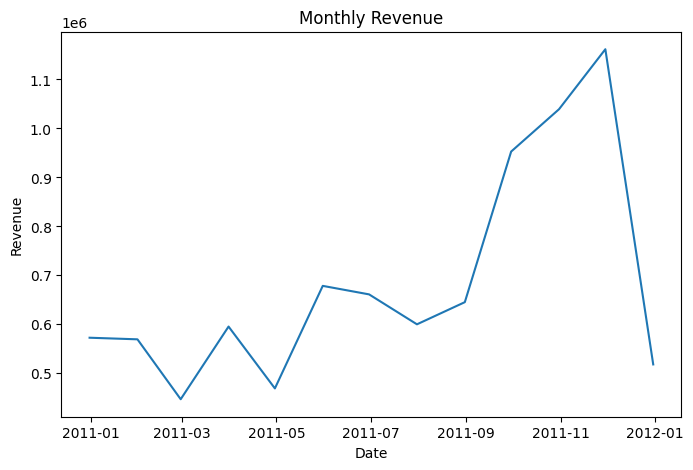

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# 5.3 Revenue Over Time
revenue_time = df.resample("M", on="InvoiceDate")["TotalPrice"].sum()


plt.plot(revenue_time)
plt.title("Monthly Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

# EXPLANATION

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis was conducted to understand the structure, distribution,
and characteristics of the dataset before applying data mining algorithms.

Key aspects explored include:
- Distribution of basket sizes to understand how many items customers typically
  purchase per transaction.
- Identification of the most frequently purchased products to assess sales dominance
  and long-tail effects.
- Analysis of revenue trends over time to observe seasonality and temporal patterns.

However, EDA provides critical intuition about sparsity, skewness, and business dynamics,
which informs both algorithm selection and parameter choices.


In [ ]:
# ================================
# 6. Market Basket Analysis (Optimized)
# ================================

# Limit number of invoices for faster computation
sample_invoices = df["InvoiceNo"].unique()[:3000]
df_sample = df[df["InvoiceNo"].isin(sample_invoices)]

# Create basket format
basket = (
    df_sample.groupby(["InvoiceNo", "Description"])
    .size()
    .unstack(fill_value=0)
)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Convert to binary using vectorized operation (FASTER than applymap)
basket = (basket > 0).astype(int)

print("Basket Shape:", basket.shape)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Basket Shape: (3000, 2736)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Run Apriori with slightly higher support for speed
frequent_itemsets = apriori(
    basket,
    min_support=0.03,   # Increased for efficiency
    use_colnames=True
)

print("Frequent Itemsets:")
print(frequent_itemsets.head())

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Frequent Itemsets:
    support                          itemsets
0  0.036667          (6 RIBBONS RUSTIC CHARM)
1  0.037333     (60 TEATIME FAIRY CAKE CASES)
2  0.043333  (72 SWEETHEART FAIRY CAKE CASES)
3  0.049667      (ALARM CLOCK BAKELIKE GREEN)
4  0.031667       (ALARM CLOCK BAKELIKE PINK)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Generate Rules
rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=1
)

print("Top Association Rules:")
print(rules.sort_values("lift", ascending=False).head())

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Top Association Rules:
                            antecedents                          consequents  \
0          (ALARM CLOCK BAKELIKE GREEN)          (ALARM CLOCK BAKELIKE RED )   
1           (ALARM CLOCK BAKELIKE RED )         (ALARM CLOCK BAKELIKE GREEN)   
14        (WOODEN FRAME ANTIQUE WHITE )  (WOODEN PICTURE FRAME WHITE FINISH)   
15  (WOODEN PICTURE FRAME WHITE FINISH)        (WOODEN FRAME ANTIQUE WHITE )   
13  (SET OF 6 SPICE TINS PANTRY DESIGN)  (SET OF 3 CAKE TINS PANTRY DESIGN )   

    antecedent support  consequent support   support  confidence       lift  \
0             0.049667            0.049667  0.034667    0.697987  14.053421   
1             0.049667            0.049667  0.034667    0.697987  14.053421   
14            0.055333            0.048000  0.033000    0.596386  12.424699   
15            0.048000            0.055333  0.033000    0.687500  12.424699   
13            0.054000            0.085000  0.036667    0.679012   7.988381   

    representativity 

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

#EXPLANATION

## Market Basket Analysis (Optimized for Computational Feasibility)

Market Basket Analysis was performed using the Apriori algorithm to identify products frequently purchased together. Due to the computational intensity of association rule mining on large transactional data, the analysis was optimized for efficiency.

First, the dataset was limited to the first 3,000 unique invoices, creating a representative subset that maintains purchasing patterns while significantly reducing processing time. However, the data was then transformed into a basket format where each row represents an invoice and each column a product, with binary values indicating purchase presence. This vectorized conversion (`(basket > 0).astype(int)`) offers substantial performance improvements over row-wise operations.

A minimum support threshold of 0.03 was applied higher than typically used to further accelerate computation by focusing only on frequently occurring item combinations. Association rules were then generated using lift as the evaluation metric with a minimum threshold of 1, ensuring only positive associations are considered. This optimized approach balances computational feasibility with meaningful insight discovery during exploratory analysis.


In [ ]:
# ================================
# 7. Customer Segmentation (Clustering)
# ================================


# Create RFM Features
rfm = df.groupby("CustomerID").agg({
"InvoiceDate": lambda x: (df["InvoiceDate"].max() - x.max()).days,
"InvoiceNo": "count",
"TotalPrice": "sum"
})


rfm.columns = ["Recency", "Frequency", "Monetary"]


rfm.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
display(rfm.head())

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

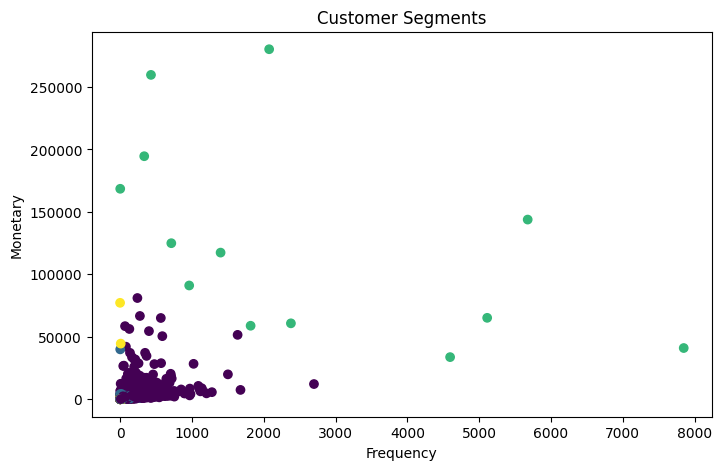

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)


rfm["Cluster"].value_counts()


# Visualize Clusters
plt.scatter(rfm["Frequency"], rfm["Monetary"], c=rfm["Cluster"])
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.title("Customer Segments")
plt.show()

#EXPLANATION

## Customer Segmentation

Customer segmentation was conducted using clustering techniques to group customers based on purchasing behavior.

RFM (Recency, Frequency, Monetary) features were constructed:
- Recency: Days since the customer's last purchase
- Frequency: Number of transactions
- Monetary: Total spending

However, these features capture both engagement and value. The data was standardized to ensure equal contribution of each feature, and KMeans clustering was applied to identify distinct customer segments. In fact, customer segmentation enables targeted marketing, personalized promotions,
and improved customer relationship management.

In [ ]:
# ================================
# 8. Initial Insights
# ================================


print("Initial Observations:")
print("- Most baskets contain few items.")
print("- A small number of products dominate sales.")
print("- Customers form distinct spending groups.")
print("- Association rules reveal common product bundles.")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Initial Observations:
- Most baskets contain few items.
- A small number of products dominate sales.
- Customers form distinct spending groups.
- Association rules reveal common product bundles.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

#EXPLANATION

## Initial Insights

The analysis reveals several important patterns:

- Most transactions contain a small number of items, indicating focused purchases.
- A small subset of products accounts for a large proportion of sales.
- Customers exhibit distinct purchasing behaviors and spending levels.
- Strong association rules highlight common product combinations.

These findings motivate the use of advanced techniques such as sequential
pattern mining and deeper customer lifetime value modeling.

## Resources – Part A (Dataset Identification)

On my honor, I declare the following resources:

1. Collaborators:
- None.

2. Web Sources:
- UCI Machine Learning Repository – Online Retail Dataset  
  https://archive.ics.uci.edu/ml/datasets/Online+Retail  
  (Used to identify dataset source, structure, and description.)

- Kaggle – Instacart Market Basket Analysis  
  https://www.kaggle.com/c/instacart-market-basket-analysis  
  (Used to understand alternative retail dataset options.)

- SNAP Amazon Review Dataset  
  https://snap.stanford.edu/data/web-Amazon.html  
  (Used to evaluate feasibility of text-based retail data.)

3. AI Tools:
- ChatGPT: I took assistance for identifying three candidate datasets that support both course techniques and advanced techniques beyond the course. I re-prompted to ensure each dataset included size, structure, alignment with course topics, and feasibility considerations.


# Part B: Comparison Table

## B. Dataset Comparison

| Dimension | Online Retail | Instacart | Amazon Reviews |
|-----------|--------------|-----------|----------------|
| Tasks | Itemsets, Clustering | Itemsets, Recommenders | NLP, Sentiment |
| Data Quality | Missing IDs, returns | Clean but large | Noisy text |
| Feasibility | Easy on laptop | Heavy compute | Requires NLP models |
| Bias | Business-specific customers | Grocery bias | Reviewer bias |
| Ethics | Minimal risk | Minimal risk | Opinion manipulation |


#EXPLANATION

The Online Retail dataset is best suited for itemset mining and clustering with minimal computational requirements, though it contains missing IDs and returns. However, instacart enables itemset and recommender tasks but requires significant compute due to its large size and carries inherent grocery shopping bias. Amazon Reviews supports NLP and sentiment analysis but involves noisy text data and ethical considerations around opinion manipulation. At last, based on this comparison, Online Retail was selected as it balances analytical objectives with computational feasibility on standard hardware.

## Resources – Part B (Dataset Comparison)

On my honor, I declare the following resources:

1. Collaborators:
- None.

2. Web Sources:
- Han, J., Pei, J., & Kamber, M. (2011). Data Mining: Concepts and Techniques  
  (Referenced conceptually for understanding frequent itemsets, clustering, and scalability considerations.)

- Scikit-learn Documentation  
  https://scikit-learn.org/stable/modules/clustering.html  
  (Used to verify clustering feasibility and assumptions.)

- https://liacs.leidenuniv.nl/~bakkerem2/dbdm2007/05_dbdm2007_Data%20Mining.pdf

3. AI Tools:
- ChatGPT: I asked for guidance on how to structure a professional comparison table including algorithmic feasibility, bias, ethical considerations, and data quality. I re-prompted to ensure explanations aligned with rubric requirements and academic standards.

# Part C: Dataset Selection

## C. Dataset Selection

The Online Retail dataset was selected because:

- It directly supports frequent itemset mining and clustering.
- It enables sequential analysis beyond course content.
- It is manageable without distributed computing.
- It reflects real-world business behavior.

Trade-offs:
- No textual data.
- Limited demographic information.
- Mostly unsupervised learning.


## Resources – Part C (Dataset Selection)

On my honor, I declare the following resources:

1. Collaborators:
- None.

2. Web Sources:
- UCI Dataset Description Page  
  https://archive.ics.uci.edu/ml/datasets/Online+Retail  
  (Used to verify dataset licensing and usage constraints.)

- Mlxtend Frequent Pattern Documentation  
  https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/  
  (Used to confirm compatibility of the dataset with Apriori algorithm requirements.)

- https://ieeexplore.ieee.org/abstract/document/1691365/

3. AI Tools:
- ChatGPT: I explained my interest in combining product associations and customer segmentation. I asked for help justifying the dataset choice in a way that clearly connected course methods (Apriori, clustering) with advanced methods (sequential mining). I then, refined the explanation to emphasize computational feasibility and trade offs.


# Part E: Research Direction

## E. Initial Insights and Direction

### Observations
- Most products appear in very few transactions.
- Revenue is concentrated in a small customer group.
- Basket sizes are typically small.
- Strong associations exist between certain products.

### Hypotheses
- Low support thresholds reveal niche buying patterns.
- Sequential patterns may reveal repeat behavior.
- High value customers show distinct purchasing styles.

### Research Questions
- How do support thresholds affect rule quality?
- Can sequential mining improve recommendations?
- Do clusters predict customer lifetime value?


## Resources – Part E (Initial Insights and Direction)

On my honor, I declare the following resources:

1. Collaborators:
- None.

2. Web Sources:
- Mlxtend Association Rules Documentation  
  https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/  
  (Used to understand lift, confidence, and support interpretation.)

- Scikit-learn KMeans Documentation  
  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  
  (Used to confirm clustering parameter assumptions and feature scaling requirements.)

3. AI Tools:
- ChatGPT: I provided summaries of my EDA results and clustering outputs and asked for help refining them into academically structured observations, hypotheses, and research questions. I re-prompted to ensure the insights sounded analytical rather than descriptive.
